Naive Bayes classifiers are a group of supervised learning classifiers that employ the Bayes rule with the “naive” assumption of conditional independence. Naive Bayes separates data into different classes according to the Bayes’ Theorem, while at the same time assuming that all the predictors are independent of one another. It assumes that a particular feature in a class is not related to the presence of other features.

For example, a fruit may be classified as an avocado if it is green, oval, and about 8 cm in diameter. A naive bayes classifier treats every feature as though it contributes independently to the probability that this fruit is an avocado, irrespective of possible correlations that may exist between color, oval-ness, and diameter features.

In [1]:
#Importing libraries
import pandas as pd             #Dataframe
import numpy as np              #Numeric analysis
%matplotlib inline

Let's load the data. We'll use the bank data publicly available at https://archive.ics.uci.edu/ml/machine-learning-databases/00222/ as bank.zip

In [2]:

data = pd.read_csv("bank_data.csv", delimiter=";")
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


Define the data to use for our task. For now, we can simply choose a few variables.

In [3]:
#Let's only choose a few variables to work for now
data = data[['age','balance','duration','y']]

#Recoding the y column as 1 and 0
data["y1"] = np.where(data["y"].str.contains("yes"), 1, 0)
data = data.loc[:, data.columns!='y']
data = data.rename(columns={'y1':'y'})

We can now split the data and define the dependent variable and the independent variables.

In [4]:
#Splitting data into train and test data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# get independent variables
X_train = train[['age','balance','duration']]

# get response variables
y_train = train[['y']]
y_train = np.ravel(y_train) 

<IPython.core.display.Javascript object>

There are different types of classifiers. The main ones include Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes.

- Bernoulli: when predictors are boolean variables (True or False). Assumes multivariate Bernoulli distribution. 

- Gaussian: if the predictors aren’t discrete (are continuous). The assumption here is that the sample is from a gaussian distribution. 

- Multinomial: suitable for classification with discrete features (e.g., word counts for text classification)

In this example, we run our model using Gaussian Naive Bayes because our chosen features are continuous.

In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
#model.fit(features,label)
model.fit(X_train, y_train)

#Predict Output
#predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
X_test = test[['age','balance','duration']]
y_test = test[['y']]

pred= model.predict(X_test) 
#print ("Predicted Value:", predicted)

Next, we check how how model performerd. We now create a confusion matrix to check how the model did in terms of prediction.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

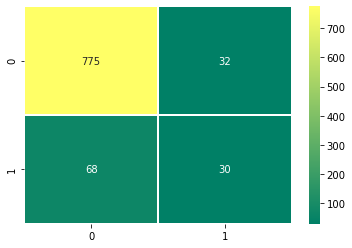

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=list(test['y']), y_pred=list((pred)))
sns.heatmap(cm, annot=True,fmt="d",linewidths=.5, cmap="summer")
plt.show()

The values in the first diagonal (775, 30) are the True Positive (TP) and True Negative (TN), respectively. That is, they are the correct predictions. On the other hand, values in the other dignonal (32, 68) are False Positive (FP) and False Negative (FN), respectively. They indicate the wrong predictions.

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8895027624309392


In [8]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred))

Precision: 0.4838709677419355
Recall: 0.30612244897959184


We can also plot the ROC/AUC to check vizualize the model's performance.The bigger the Area Under the Curve (AUC), the better performance.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

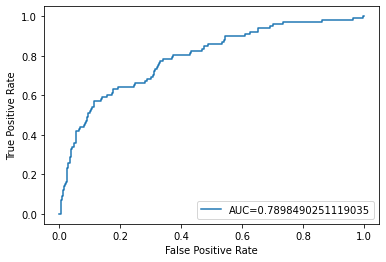

In [9]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

pred = model.predict_proba(test[['age','balance','duration']])[:, 1] #Remember to add [:, 1], otherwise, it will spit an error
fpr, tpr, thresholds = roc_curve(y_true=list(test['y']), y_score=list(pred))
auc = roc_auc_score(y_true=list(test['y']), y_score=list(pred))

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Useful resources:
- https://www.upgrad.com/blog/naive-bayes-classifier/
- https://scikit-learn.org/stable/modules/naive_bayes.html#